# 6b. Visualisierung eines Textes als Wortwolke

## Inhalte 
1. Intro Wortwolken
2. Wortwolken basierend auf einem Text
3. Wortwolken basierend auf einem Korpus

Zunächst müssen wir benötigte Objekte laden und Einstellungen setzen. (Alle folgenden Codezellen müssen ausgeführt werden.)


In [1]:
import pathlib

import nltk
import stylecloud
from IPython.display import Image, display
from reader import fairytale_corpus_reader

DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
GERMAN_STOPWORDS = set(nltk.corpus.stopwords.words("german"))
IMG_DATA_DIR = DATA_DIR.joinpath("images")

## 1. Intro Wortwolken
Wortwolken sind eine häufig genutzte Visualisierungsart für Texte.
+ Wortwolken zeigen Wörter, die im Text vorkommen
+ Je häufiger das Wort vorkommt, desto größer wird es angezeigt

<div class="alert alert-block alert-info">
    <b>Vorverarbeitung</b>: Stoppwörter sollten üblicherweise aus dem Text entfernt werden, um aussagekräftige Wortwolken zu erhalten. Je nach Fragestellung bzw. Zweck der Visualisierung sind weitere Vorverarbeitungsschritte sinnvoll (z.B. POS-tagging oder Lemmatisierung). 
</div>

## 2. Wortwolke einzelner Text

In der folgenden Codezelle wird eine Funktion definiert, die
+ drei Argumente hat: `text`, `image_filename` und `icon_name`
+ die Funktion `gen_stylecloud` aus dem Paket Stylecloud aufruft
    + bestimmte Attribute an die Funktion übergibt z. B. `text`
    + den Wert bestimmter Attribute festlegt z. B. `custom_stopwords`
+ als Output die erstellte Wordcloud anzeigen lässt (`return Image(filename)`)

In [2]:
def generate_stylecloud(text, image_filename, icon_name):
    filename = IMG_DATA_DIR.joinpath(image_filename)
    stylecloud.gen_stylecloud(
        text,
        custom_stopwords=GERMAN_STOPWORDS,
        icon_name=icon_name,
        output_name=filename,
    )
    return Image(filename)

Durch das Ausführen der oben stehenden Codezelle wird die Funktion `generate_stylecloud` gespeichert und kann später aufgerufen werden.

In der folgenden Codezelle wird der Text, auf dessen Grundlage die Wortwolke erstellt werden soll, der Variable `text` zugewiesen.

In [3]:
# Full-text of "Der Froschkönig oder der eiserne Heinrich (1857)"
# Source: https://de.wikisource.org/wiki/Der_Froschk%C3%B6nig_oder_der_eiserne_Heinrich_(1857)
text = """In den alten Zeiten, wo das Wünschen noch geholfen hat, lebte ein König, dessen Töchter waren alle schön, aber die jüngste war so schön, daß die Sonne selber, die doch so vieles gesehen hat, sich verwunderte so oft sie ihr ins Gesicht schien. Nahe bei dem Schlosse des Königs lag ein großer dunkler Wald, und in dem Walde unter einer alten Linde war ein Brunnen: wenn nun der Tag recht heiß war, so ging das Königskind hinaus in den Wald und setzte sich an den Rand des kühlen Brunnens: und wenn sie Langeweile hatte, so nahm sie eine goldene Kugel, warf sie in die Höhe und fieng sie wieder; und das war ihr liebstes Spielwerk.

Nun trug es sich einmal zu, daß die goldene Kugel der Königstochter nicht in ihr Händchen fiel, das sie in die Höhe gehalten hatte, sondern vorbei auf die Erde schlug und geradezu ins Wasser hinein rollte. Die Königstochter folgte ihr mit den Augen nach, aber die Kugel verschwand, und der Brunnen war tief, so tief daß man keinen Grund sah. Da fieng sie an zu weinen und weinte immer lauter und konnte sich gar nicht trösten. Und wie sie so klagte, rief ihr jemand zu „was hast du vor, Königstochter, du schreist ja daß sich ein Stein erbarmen möchte.“ Sie sah sich um, woher die Stimme käme, da erblickte sie einen Frosch, der seinen dicken häßlichen Kopf aus dem Wasser streckte. „Ach, du bists, alter Wasserpatscher,“ sagte sie, „ich weine über meine goldene Kugel, die mir in den Brunnen hinab gefallen ist.“ „Sei still und weine nicht“, antwortete der Frosch, „ich kann wohl Rath [2] schaffen, aber was gibst du mir, wenn ich dein Spielwerk wieder heraufhole“? „Was du haben willst, lieber Frosch,“ sagte sie, „meine Kleider, meine Perlen und Edelsteine, auch noch die goldene Krone, die ich trage.“ Der Frosch antwortete „deine Kleider, deine Perlen und Edelsteine, und deine goldene Krone, die mag ich nicht: aber wenn du mich lieb haben willst, und ich soll dein Geselle und Spielkamerad sein, an deinem Tischlein neben dir sitzen, von deinem goldenen Tellerlein essen, aus deinem Becherlein trinken, in deinem Bettlein schlafen: wenn du mir das versprichst, so will ich hinunter steigen und dir die goldene Kugel wieder herauf holen.“ „Ach ja,“ sagte sie, „ich verspreche dir alles, was du willst, wenn du mir nur die Kugel wieder bringst.“ Sie dachte aber „was der einfältige Frosch schwätzt, der sitzt im Wasser bei seines Gleichen und quackt, und kann keines Menschen Geselle sein.“

Der Frosch, als er die Zusage erhalten hatte, tauchte seinen Kopf unter, sank hinab und über ein Weilchen kam er wieder herauf gerudert, hatte die Kugel im Maul und warf sie ins Gras. Die Königstochter war voll Freude, als sie ihr schönes Spielwerk wieder erblickte, hob es auf und sprang damit fort. „Warte, warte,“ rief der Frosch, „nimm mich mit, ich kann nicht so laufen wie du.“ Aber was half ihm daß er ihr sein quack quack so laut nachschrie als er konnte! sie hörte nicht darauf, eilte nach Haus und hatte bald den armen Frosch vergessen, der wieder in seinen Brunnen hinab steigen mußte.

Am andern Tage, als sie mit dem König und allen Hofleuten sich zur Tafel gesetzt hatte und von ihrem goldenen Tellerlein aß, da kam, plitsch platsch, plitsch platsch, etwas die Marmortreppe herauf gekrochen, und als es oben angelangt war, klopfte es an der Thür und rief „Königstochter, jüngste, mach mir auf.“ Sie lief und wollte sehen wer draußen wäre, als sie aber aufmachte, [3] so saß der Frosch davor. Da warf sie die Thür hastig zu, setzte sich wieder an den Tisch, und war ihr ganz angst. Der König sah wohl daß ihr das Herz gewaltig klopfte und sprach „mein Kind, was fürchtest du dich, steht etwa ein Riese vor der Thür und will dich holen?“ „Ach nein,“ antwortete sie, „es ist kein Riese, sondern ein garstiger Frosch.“ „Was will der Frosch von dir?“ „Ach lieber Vater, als ich gestern im Wald bei dem Brunnen saß und spielte, da fiel meine goldene Kugel ins Wasser. Und weil ich so weinte, hat sie der Frosch wieder heraufgeholt, und weil er es durchaus verlangte, so versprach ich ihm er sollte mein Geselle werden, ich dachte aber nimmermehr daß er aus seinem Wasser heraus könnte. Nun ist er draußen und will zu mir herein.“ Indem klopfte es zum zweitenmal und rief

„Königstochter, jüngste,
mach mir auf,
weißt du nicht was gestern
du zu mir gesagt
bei dem kühlen Brunnenwasser?
Königstochter, jüngste,
mach mir auf.“

Da sagte der König „was du versprochen hast, das mußt du auch halten; geh nur und mach ihm auf.“ Sie gieng und öffnete die Thüre, da hüpfte der Frosch herein, ihr immer auf dem Fuße nach, bis zu ihrem Stuhl. Da saß er und rief „heb mich herauf zu dir.“ Sie zauderte bis es endlich der König befahl. Als der Frosch erst auf dem Stuhl war, wollte er auf den Tisch, und als er da saß, sprach er „nun schieb mir dein goldenes Tellerlein näher, damit wir zusammen essen.“ Das that sie zwar, aber man sah wohl daß sies nicht gerne that. Der Frosch ließ sichs gut schmecken, aber ihr blieb fast jedes Bißlein im Halse. Endlich sprach er „ich habe mich satt gegessen, und bin müde, nun trag mich in dein Kämmerlein [4] und mach dein seiden Bettlein zurecht, da wollen wir uns schlafen legen.“ Die Königstochter fieng an zu weinen und fürchtete sich vor dem kalten Frosch, den sie nicht anzurühren getraute, und der nun in ihrem schönen reinen Bettlein schlafen sollte. Der König aber ward zornig und sprach „wer dir geholfen hat, als du in der Noth warst, den sollst du hernach nicht verachten.“ Da packte sie ihn mit zwei Fingern, trug ihn hinauf und setzte ihn in eine Ecke. Als sie aber im Bett lag, kam er gekrochen und sprach „ich bin müde, ich will schlafen so gut wie du: heb mich herauf, oder ich sags deinem Vater.“ Da ward sie erst bitterböse, holte ihn herauf und warf ihn aus allen Kräften wider die Wand, „nun wirst du Ruhe haben, du garstiger Frosch.“

Als er aber herab fiel, war er kein Frosch, sondern ein Königssohn mit schönen und freundlichen Augen. Der war nun nach ihres Vaters Willen ihr lieber Geselle und Gemahl. Da erzählte er ihr, er wäre von einer bösen Hexe verwünscht worden, und Niemand hätte ihn aus dem Brunnen erlösen können als sie allein, und morgen wollten sie zusammen in sein Reich gehen. Dann schliefen sie ein, und am andern Morgen, als die Sonne sie aufweckte, kam ein Wagen heran gefahren mit acht weißen Pferden bespannt, die hatten weiße Straußfedern auf dem Kopf, und giengen in goldenen Ketten, und hinten stand der Diener des jungen Königs, das war der treue Heinrich. Der treue Heinrich hatte sich so betrübt, als sein Herr war in einen Frosch verwandelt worden, daß er drei eiserne Bande hatte um sein Herz legen lassen, damit es ihm nicht vor Weh und Traurigkeit zerspränge. Der Wagen aber sollte den jungen König in sein Reich abholen; der treue Heinrich hob beide hinein, stellte sich wieder hinten auf und war voller Freude über die Erlösung. Und als sie ein Stück Wegs gefahren waren, hörte der Königssohn daß es hinter ihm krachte, als wäre etwas zerbrochen. Da drehte er sich um und rief

„Heinrich, der Wagen bricht.“
„Nein, Herr, der Wagen nicht,
es ist ein Band von meinem Herzen,
das da lag in großen Schmerzen,
als ihr in dem Brunnen saßt,
als ihr eine Fretsche (Frosch) wast (wart).“

Noch einmal und noch einmal krachte es auf dem Weg, und der Königssohn meinte immer der Wagen bräche, und es waren doch nur die Bande, die vom Herzen des treuen Heinrich absprangen, weil sein Herr erlöst und glücklich war."""

Nun kann die Wortwolke erstellt werden.

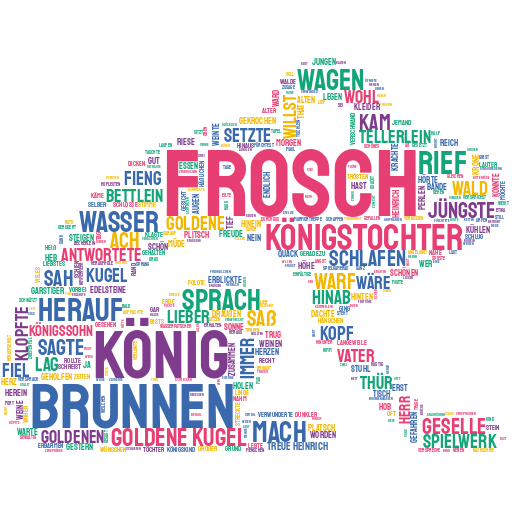

In [4]:
generate_stylecloud(text, "frog.png", "fas fa-frog")

Die Funktion `generate_stylecloud` hat drei Argumente:
1. der Text, der als Wortwolke visualisiert werden soll
2. der Name, unter dem das generierte Bild abgespeichert werden soll
3. das Icon, in dessen Form die Wortwolke gebildet werden soll


<div class='alert alert-warning'>
    <b>Übung</b>: Verändere alle drei Argumente, sodass eine neue Wortwolke in einer neuen Form mit einem neuen Bildtitel entsteht. Verwende dafür die beiden unten stehenden Codezellen. Hinweis: Zur Verfügung stehen die kostenlosen Icons von <a href="https://fontawesome.com/v5.15/icons">Font Awesome</a>.
</div>

In [5]:
new_text = """insert new text here"""

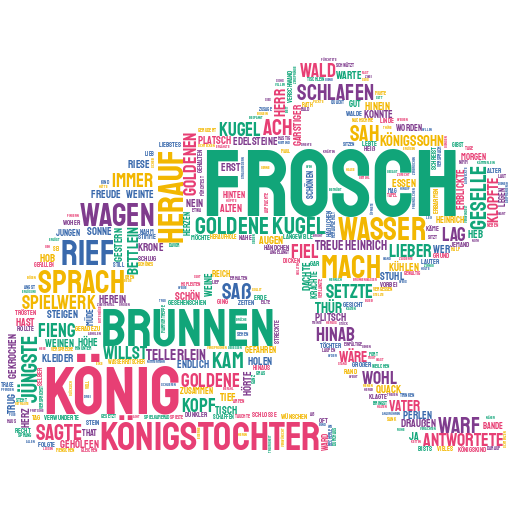

In [6]:
generate_stylecloud(text, "frog.png", "fas fa-frog")

## 3. Wortwolke Textcorpus

Wie oben beschrieben können Wortwolken einen Überblick über einen einzelnen Text geben. Im Folgenden schauen wir uns an, wie mithilfe von Visualisierungen ein **Überblick über ein Textkorpus** erlangt werden kann.

Hier wird eine neue Funktion definiert, die
+ zwei Argumente hat: `query` und `num_wordclouds`
+ für jedes Märchen im Korpus den Namen des Märchens und eine Wortwolke ausgibt 
    + falls ein bestimmter Begriff (Wert des Arguments `query`) im Märchen vorkommt
+ für die Wortwolken
    + `GERMAN_STOPWORDS` als Stoppwörter verwendet
    + `fas fa-book open` (Icon eines aufgeschlagenen Buches) als Icon verwendet
+ den Vorgang abbricht, sobald die Anzahl an maximal erwünschten Wortwolken (`num_wordclouds`) erreicht ist

In [7]:
image_filename = "temp.png"
filename = IMG_DATA_DIR.joinpath(image_filename)


def wordclouds_from_query(query, num_wordclouds):
    counter = 0
    for fairytale in fairytale_corpus_reader.fileids():
        text = fairytale_corpus_reader.raw(fairytale).lower()
        if query in text:
            counter += 1
            print(fairytale)
            stylecloud.gen_stylecloud(
                text,
                custom_stopwords=GERMAN_STOPWORDS,
                icon_name="fas fa-book-open",
                output_name=filename,
            )
            display(Image(filename))
            if counter == num_wordclouds:
                break

<div class='alert alert-warning'> 
    <b>Übung</b>: Verwende die Funktion <code>wordclouds_from_query</code>, um einen Überblick über Texte zu erhalten, die das Wort "königstochter" enthalten. Erstelle maximal 10 Wortwolken. 
    <br>
    Hinweis: Je mehr Wortwolken erstellt werden, desto länger dauert es, den Code auszuführen.
    <br>
    Was fällt beim Vergleich der Wortwolken auf?
</div>

grimm_das_dietmarsische_luegenmaerchen_294-294.txt


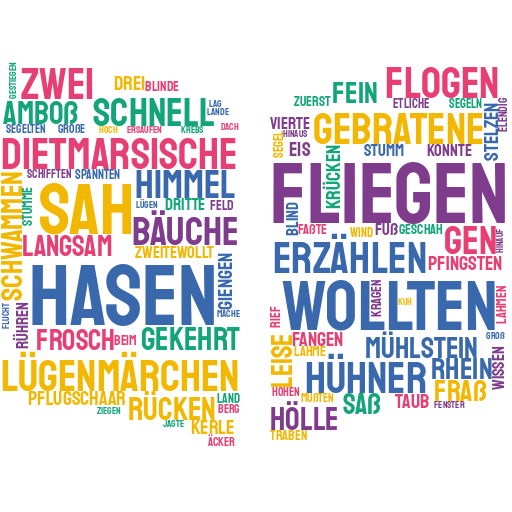

grimm_der_geist_im_glas_072-076.txt


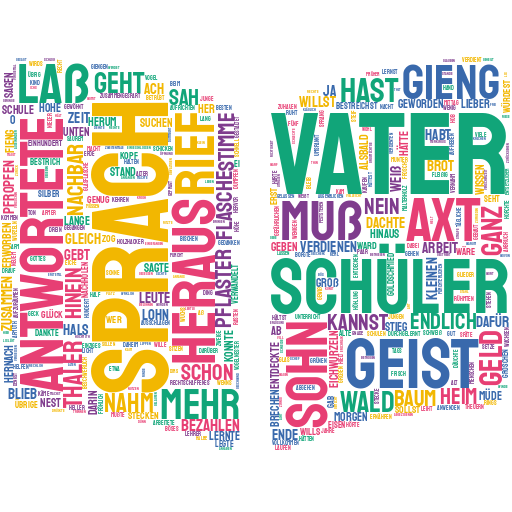

grimm_der_zaunkoenig_342-345.txt


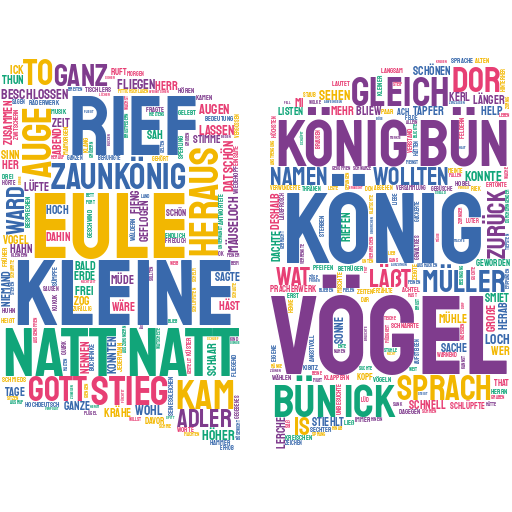

In [8]:
wordclouds_from_query(query="frosch", num_wordclouds=3)

# **Optionaler** weiterer Inhalt

Die Funktion `generate_stylecloud` verwendet deutsche Stoppwörter und nur einen Teil der möglichen Argumente von `gen_stylecloud`. 

a) Passe die Funktionen so an, dass Stoppwörter einer anderen Sprache verwendet werden und teste mithilfe eines entsprechenden Textes, ob die Anpassung funktioniert.

b)  Erweitere die Funktion `generate_stylecloud`, sodass mehr Flexibilität bei der Erstellung von Wortwolken möglich ist (z. B. durch eine andere Farbpalette oder die maximale Anzahl an angezeigten Wörtern). Hinweis: Weitere mögliche Argumente von `gen_stylecloud` finden sich auf der [GitHub-Seite von Stylecloud](https://github.com/minimaxir/stylecloud) im Abschnitt "Helpful Parameters".


In [9]:
import session_info

session_info.show()